In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score

In [9]:
dataframe = pd.read_csv('./data/PAMAP2_Extracted_300_25.csv')

X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [10]:
def MLPClassification(X, y, hidden_layer_sizes=[64, 32, 16]):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.20)

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=331)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred,average=None).mean()
    r = recall_score(y_test, y_pred, average=None).mean()

    print("Accuracy: %.3f \nPrecision: %.3f \nRecall: %.3f" % (acc, p, r) )

    cm = confusion_matrix(y_test, y_pred, normalize = 'true')

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=['Other', 'Sitting', 'Standing', 'Running', 'Rope jumping']
    )

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax)
    
    return acc, p, r

### Checking hidden layers sizes

- - - - - - - - - - - - -
Hidden layer sizes [64, 32, 16]
Accuracy: 0.926 
Precision: 0.903 
Recall: 0.893
- - - - - - - - - - - - -
Hidden layer sizes [128, 64, 32]
Accuracy: 0.937 
Precision: 0.933 
Recall: 0.896
- - - - - - - - - - - - -
Hidden layer sizes [512, 256, 128]
Accuracy: 0.953 
Precision: 0.958 
Recall: 0.919


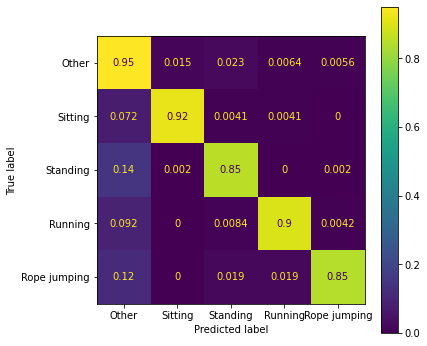

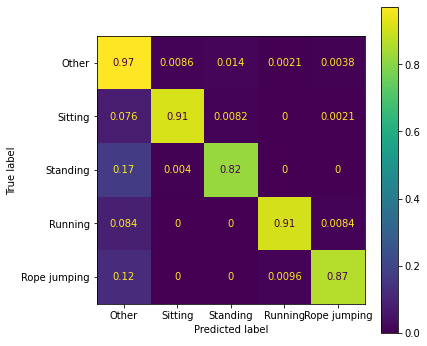

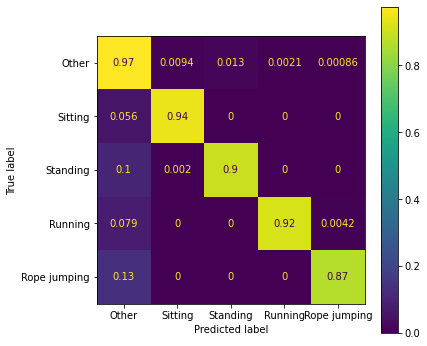

In [11]:
layers_list = [
    [64, 32, 16],
    [128, 64, 32],
    [512, 256, 128],
    # [128, 64, 64, 32, 32, 16]
]

accs = []
pres = []
recs = []

for layers in layers_list:
    print("- - - - - - - - - - - - -")
    print("Hidden layer sizes", layers)
    
    acc, p, r = MLPClassification(X, y, layers)
    
    accs.append(acc)
    pres.append(p)
    recs.append(r)

32768
262144
16777216


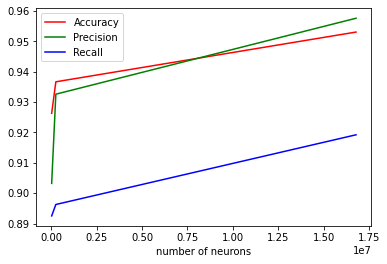

In [12]:
neurons_total = []

for layers in layers_list:
    neurons_total.append(np.prod(layers))

for a in neurons_total:
    print(a)

plt.figure()
plt.plot(neurons_total, accs, 'r', label='Accuracy')
plt.plot(neurons_total, pres, 'g', label='Precision')
plt.plot(neurons_total, recs, 'b', label='Recall')
plt.xlabel('number of neurons')
plt.legend()
plt.show()

In [13]:
acc_1_3_cols = []
acc_4_6_cols = []
gyroscope_cols = []
magnetometer_cols = []

for i in range(1, X.shape[1], 12):
    acc_1_3_cols.append(str(i))
    acc_1_3_cols.append(str(i+1))
    acc_1_3_cols.append(str(i+2))

for i in range(4, X.shape[1], 12):
    acc_4_6_cols.append(str(i))
    acc_4_6_cols.append(str(i+1))
    acc_4_6_cols.append(str(i+2))
    
for i in range(7, X.shape[1], 12):
    gyroscope_cols.append(str(i))
    gyroscope_cols.append(str(i+1))
    gyroscope_cols.append(str(i+2))
    
for i in range(10, X.shape[1], 12):
    magnetometer_cols.append(str(i))
    magnetometer_cols.append(str(i+1))
    magnetometer_cols.append(str(i+2))

#### Acceleromter +16g only

Accuracy: 0.844 
Precision: 0.830 
Recall: 0.798


(0.8436135371179039, 0.8304598674479946, 0.7980881799344465)

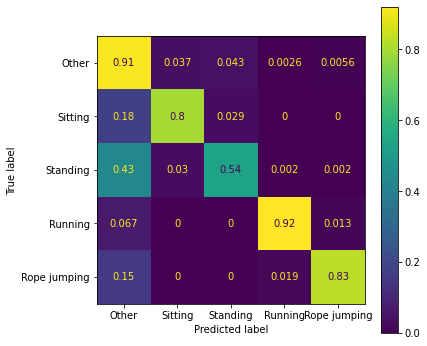

In [14]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Acceleromter +6g only

Accuracy: 0.843 
Precision: 0.832 
Recall: 0.798


(0.8433406113537117, 0.8316003884686263, 0.7975445167802515)

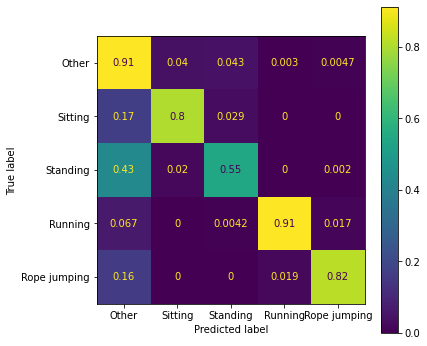

In [15]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Gryoscope only

Accuracy: 0.688 
Precision: 0.640 
Recall: 0.616


/home/werdon4/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.6875, 0.6400131783940581, 0.6159636261127239)

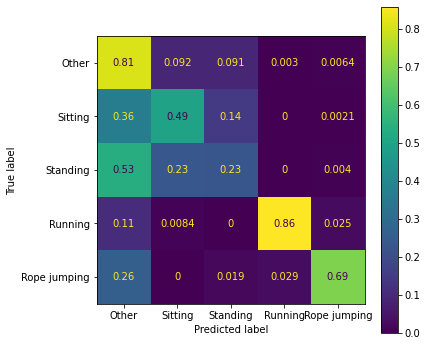

In [16]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Magnetometer only

Accuracy: 0.904 
Precision: 0.865 
Recall: 0.847


(0.9042030567685589, 0.8651048769526012, 0.8473976492683952)

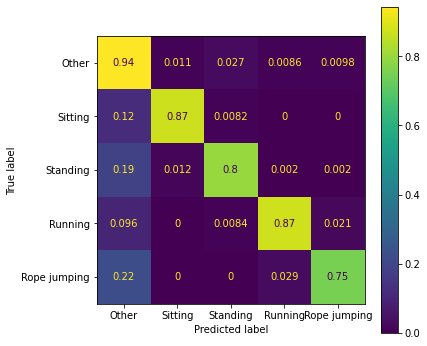

In [17]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Acceleromter (+6g) + Magnetometr

Accuracy: 0.942 
Precision: 0.922 
Recall: 0.912


(0.9418668122270742, 0.9223601064804312, 0.9120667613619474)

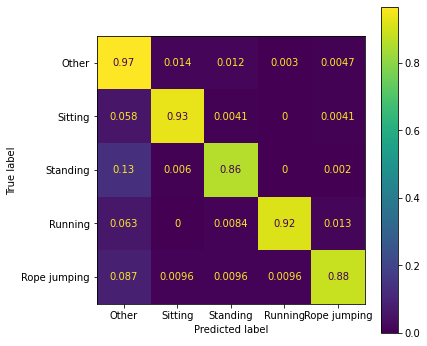

In [18]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Acceleromter (+6g) + Gyroscope

Accuracy: 0.834 
Precision: 0.826 
Recall: 0.813


(0.8337882096069869, 0.8262997164965376, 0.8130120495814935)

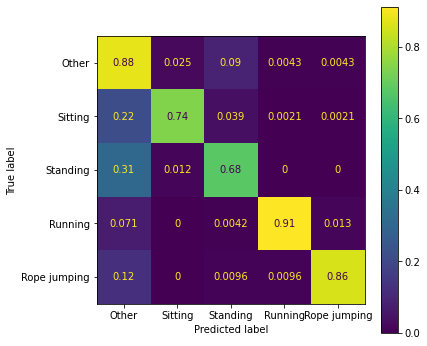

In [19]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])

#### Gyroscope + Magnetometr

Accuracy: 0.885 
Precision: 0.868 
Recall: 0.841


(0.884825327510917, 0.8676142087067932, 0.8413118600272078)

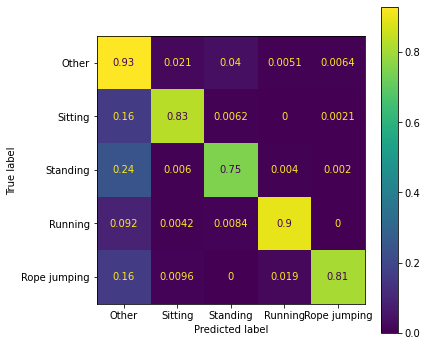

In [20]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)

MLPClassification(X, y, [128, 64, 32])